# Data Wrangling on IDS KDD-99 Dataset

The dataset contains 4 main categories of attacks in a local-area network:

* DOS - Denial of service attacks which overwhelm the victim host with a huge number of requests, shutting down a website completely.

* R2L - Remote to Local where a hacker attempts to get local user privileges.

* U2R - Hacker operates as a normal user and abuses vulnerabilities in the system.

* Probing - Hacker scans the machine to determine vulnerabilities that may later be exploited so as to compromise the system.

# Explore the columns/info in the table 10% dataset KDD-99

In [1]:
## Import required libraries
import os
import numpy                   as np
import pandas                  as pd
import matplotlib              as pl
import seaborn                 as sns

## Reading .csv files
df = pd.read_csv("data/kddcup-training.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

# Identifying columns as categorical or continuous

In [3]:
## Identifying columns as categorical or not
categorical_columns = ["protocol_type","service","flag","land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login","label"]
df_categorical = df[categorical_columns]
df_non_categorical = df.drop(categorical_columns, axis=1)

In [4]:
## List non categorical data
df_non_categorical.describe()


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.006433,0.000014,0.034519,0.000152,0.010212,0.011352,0.001083,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.134805,0.005510,0.782103,0.015520,1.798326,2.012718,0.096416,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,993.000000,28.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removal of duplicates

In [5]:
## Removal of duplicates
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count
count_row

494021

In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
count_row = df.shape[0]
count_row

145586

In [7]:
df.shape

(145586, 42)

In [8]:
## List types of attacks
df['label'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: label, dtype: int64

# Identify what type of attacks are frequently used for different types of services

In [9]:
## Create a subset of main dataset (f_data) that contains only services and labels 

f_services = pd.crosstab(index=df["service"],columns="count")
#type(f_services)
#f_services
f_attacks = pd.crosstab(index=df["label"],columns="count")
#type(f_attacks)
#f_attacks

In [10]:
## For all the services identify attack types and extract into f_data
f_data = df[df['service'].isin(list(f_services.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]
## Create the plot
attack_data = pd.crosstab(index = f_data["label"], columns=f_data["service"])
attack_data.head()

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,...,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
label,,,,,,,,,,,,,,,,,,,,,
back.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
buffer_overflow.,0,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
ftp_write.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
guess_passwd.,0,0,0,0,0,0,0,0,0,0,...,53,0,0,0,0,0,0,0,0,0
imap.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


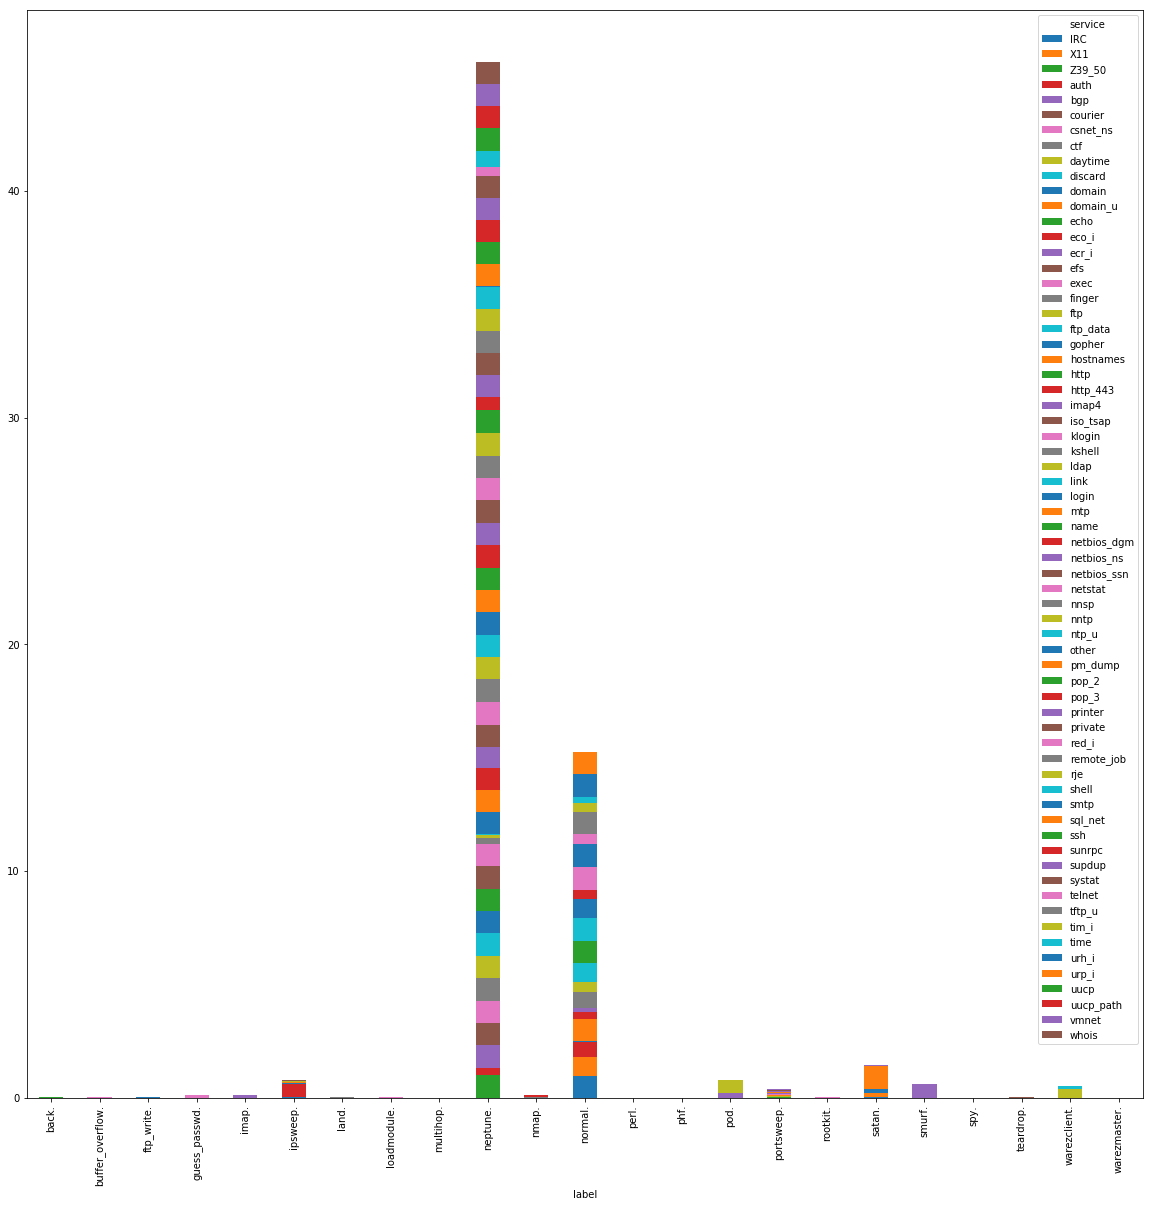

In [11]:
frequency_table_attack = (attack_data/attack_data.sum())
frequency_table_attack.plot(kind="bar", 
                 figsize=(20,20),
                 stacked=True);

# Identify what type of protocols are frequently used for different types of attacks

In [12]:
## Create a subset of main dataset (f_data) that contains only protocols and labels to understand what type of protocols
# are frequently used for the attacks

f_protocol = pd.crosstab(index=df["protocol_type"],columns="count")
f_data = df[df['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]
#f_data
## Create a Table for Plotting
relationship_protocol_attack = pd.crosstab(index=f_data["label"], 
                                            columns=f_data["protocol_type"])
relationship_protocol_attack

protocol_type,icmp,tcp,udp
label,,,
back.,0,968,0
buffer_overflow.,0,30,0
ftp_write.,0,8,0
guess_passwd.,0,53,0
imap.,0,12,0
ipsweep.,560,91,0
land.,0,19,0
loadmodule.,0,9,0
multihop.,0,7,0


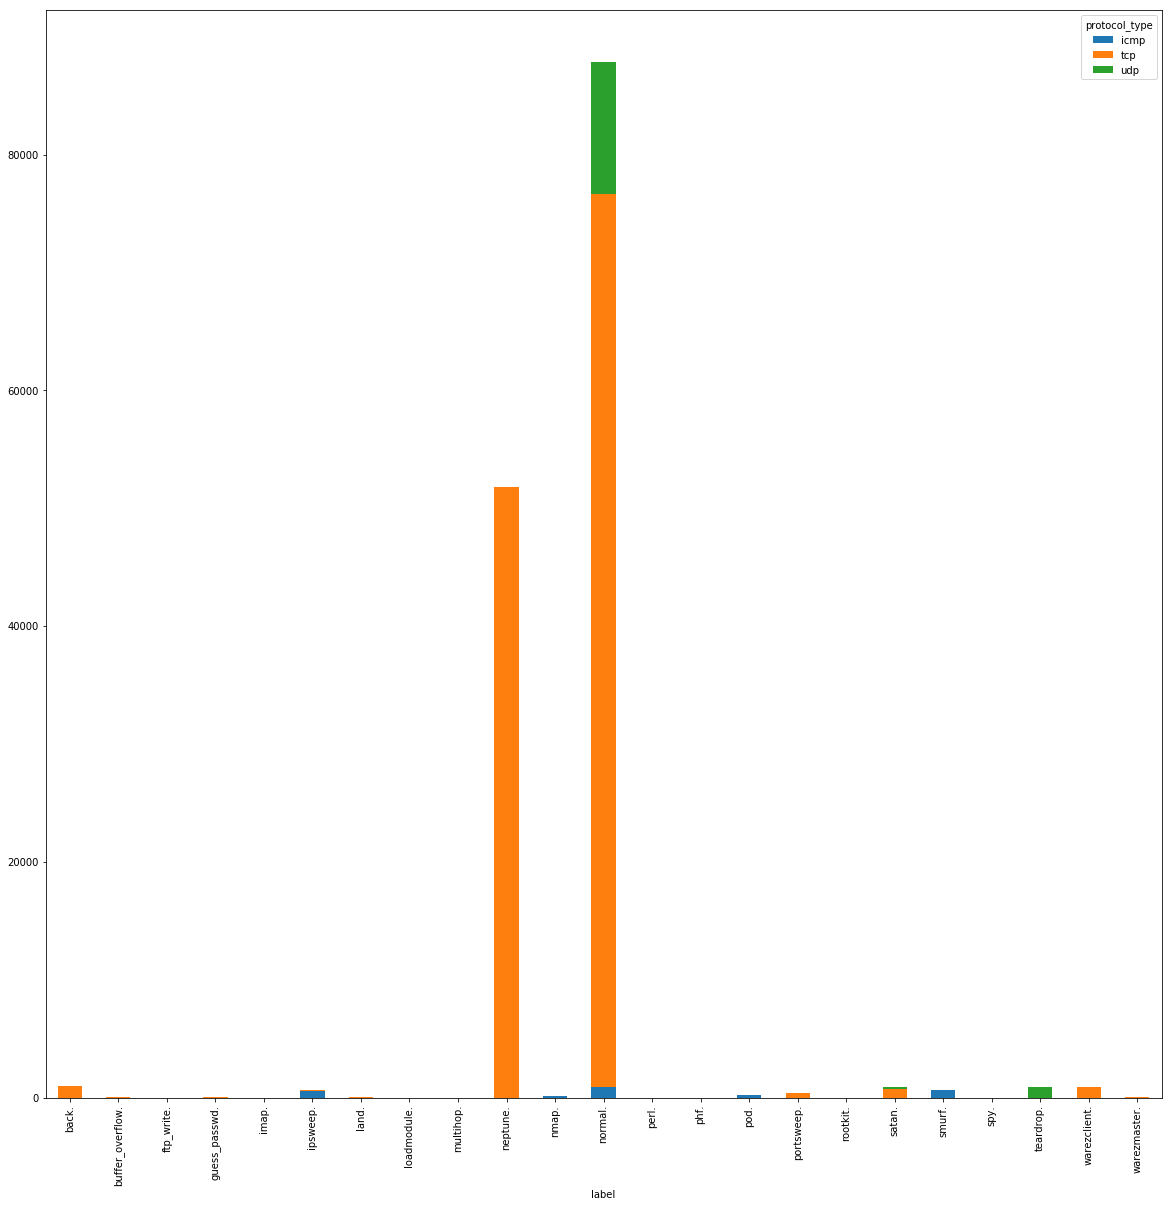

In [13]:
## Plot the Table
relationship_protocol_attack.plot(kind="bar", 
                                   figsize=(20,20),
                                   stacked=True);

# Identify  usage percentage of protocols for the attacks

In [14]:
## Create a cross tab dataframe
protocol_data = pd.crosstab(index = df["protocol_type"],columns="Protocol type")
frequency_table_protocol = (protocol_data/protocol_data.sum())
frequency_table_protocol


col_0,Protocol type
protocol_type,
icmp,0.016526
tcp,0.899214
udp,0.084259


The bar plot below shows connection type (normal or malicious) by internet protocol (TCP, UDP or ICMP) within the training dataset.

* Most connections use TCP, understandably (e.g. HTTP, SMTP, FTP, telnet, etc rely on TCP); of those, normal and malicious are in almost equal proportion.

* UDP connections are primarily non-malicious (e.g. DNS, DHCP).

* ICMP connections are primarily malicious (e.g. ping and traceroute), used often in DOS attacks.

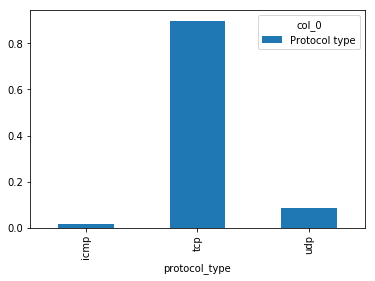

In [15]:
## Plot the dataframe
frequency_table_protocol.plot.bar()

# As most of the attacks use TCP lets examine Basic features of a TCP normal connection vs during attack 

In [16]:
tcp_flag = pd.crosstab(index=df["flag"],columns="count")
tcp_data = df[df['flag'].isin(list(tcp_flag.index))]
tcp_data = tcp_data[tcp_data['label'].isin(list(f_attacks.index))]
#tcp_data
## Create a Table for Plotting
relationship_tcp_flag_attack = pd.crosstab(index=tcp_data["label"], 
                                           columns=tcp_data["flag"])
relationship_tcp_flag_attack
#tcp_flag_data = pd.crosstab(index = df["flag"],columns="TCP Flags")
#tcp_table_protocol = (tcp_flag_data/tcp_flag_data.sum())
#tcp_table_protocol

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
label,,,,,,,,,,,
back.,0,0,0,0,90,0,2,5,0,871,0
buffer_overflow.,0,0,1,0,0,0,0,0,0,29,0
ftp_write.,0,0,0,0,0,0,0,0,0,8,0
guess_passwd.,0,0,45,0,4,0,0,0,2,2,0
imap.,0,0,0,0,0,1,1,0,0,6,4
ipsweep.,0,80,3,0,0,0,0,0,0,568,0
land.,0,0,0,0,0,19,0,0,0,0,0
loadmodule.,0,0,0,0,0,0,0,0,0,9,0
multihop.,0,0,0,0,0,0,0,0,0,7,0


The bar plot below shows connection type (normal or malicious) by TCP connection flag within the training dataset.
Each connection has an associated flag indicating the status of the connection e.g. initiated but not acknowledged, rejected, reset,completed successfully, etc. 

* Most connections have an SF flag, indicating normal SYN/FIN completion, hence the majority of those are non-malicious connections.
* The large majority of S0 connections are malicious, which makes sense since this flag refers to an initial SYN seen but no reply sent.
* REJ and RST connections (i.e. rejected or reset), though smaller in number, mostly correspond to malicious connections which makes intuitive sense.

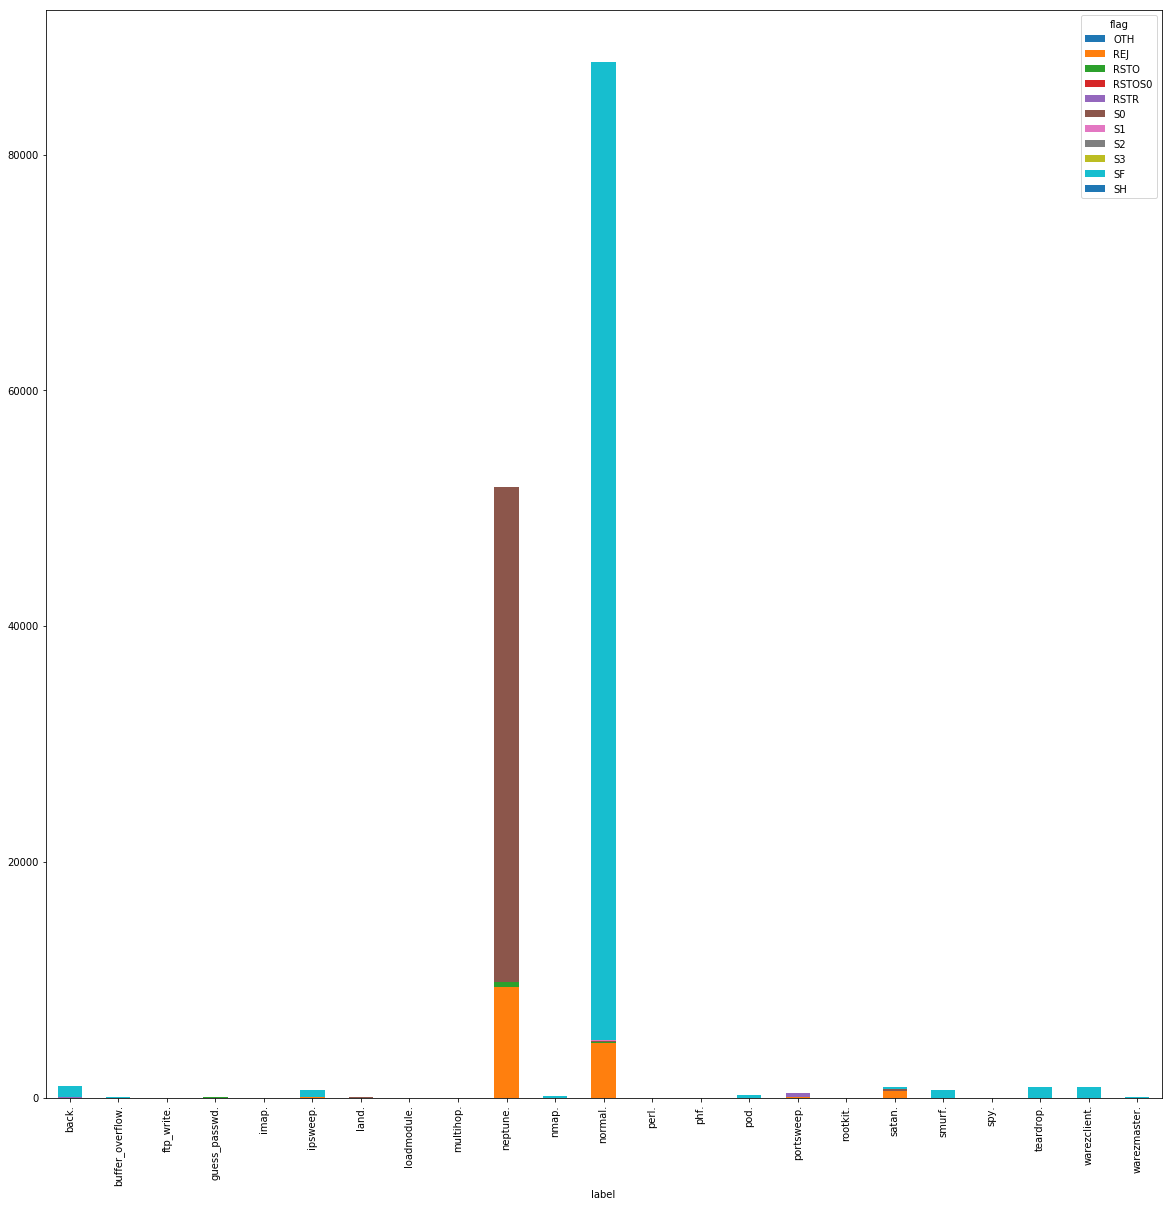

In [17]:
## Plot the dataframe
relationship_tcp_flag_attack.plot(kind="bar", 
                                   figsize=(20,20),
                                   stacked=True);

# Telnet service - TCP normal connection vs during attack

In [18]:
tcp_flag = pd.crosstab(index=df["flag"],columns="count")
tcp_data = df[df['flag'].isin(list(tcp_flag.index))]
tcp_data = tcp_data[tcp_data['label'].isin(list(f_attacks.index))]
#tcp_data
tcp_data_telnet_data = tcp_data[tcp_data['service'] == 'telnet']
#tcp_data_telnet_data
## Create a Table for Plotting
relationship_telnet_tcp_flag_attack = pd.crosstab(index=tcp_data_telnet_data["label"], 
                                           columns=tcp_data_telnet_data["flag"])
#relationship_telnet_tcp_flag_attack = relationship_telnet_tcp_flag_attack/relationship_telnet_tcp_flag_attack.sum()
relationship_telnet_tcp_flag_attack

flag,RSTO,RSTR,S0,S1,S3,SF,SH
label,,,,,,,
buffer_overflow.,1,0,0,0,0,20,0
guess_passwd.,45,4,0,0,2,2,0
ipsweep.,0,0,0,0,0,1,0
land.,0,0,1,0,0,0,0
loadmodule.,0,0,0,0,0,5,0
multihop.,0,0,0,0,0,2,0
neptune.,20,0,176,0,0,0,0
nmap.,0,0,0,0,0,0,1
normal.,7,6,1,4,0,201,0


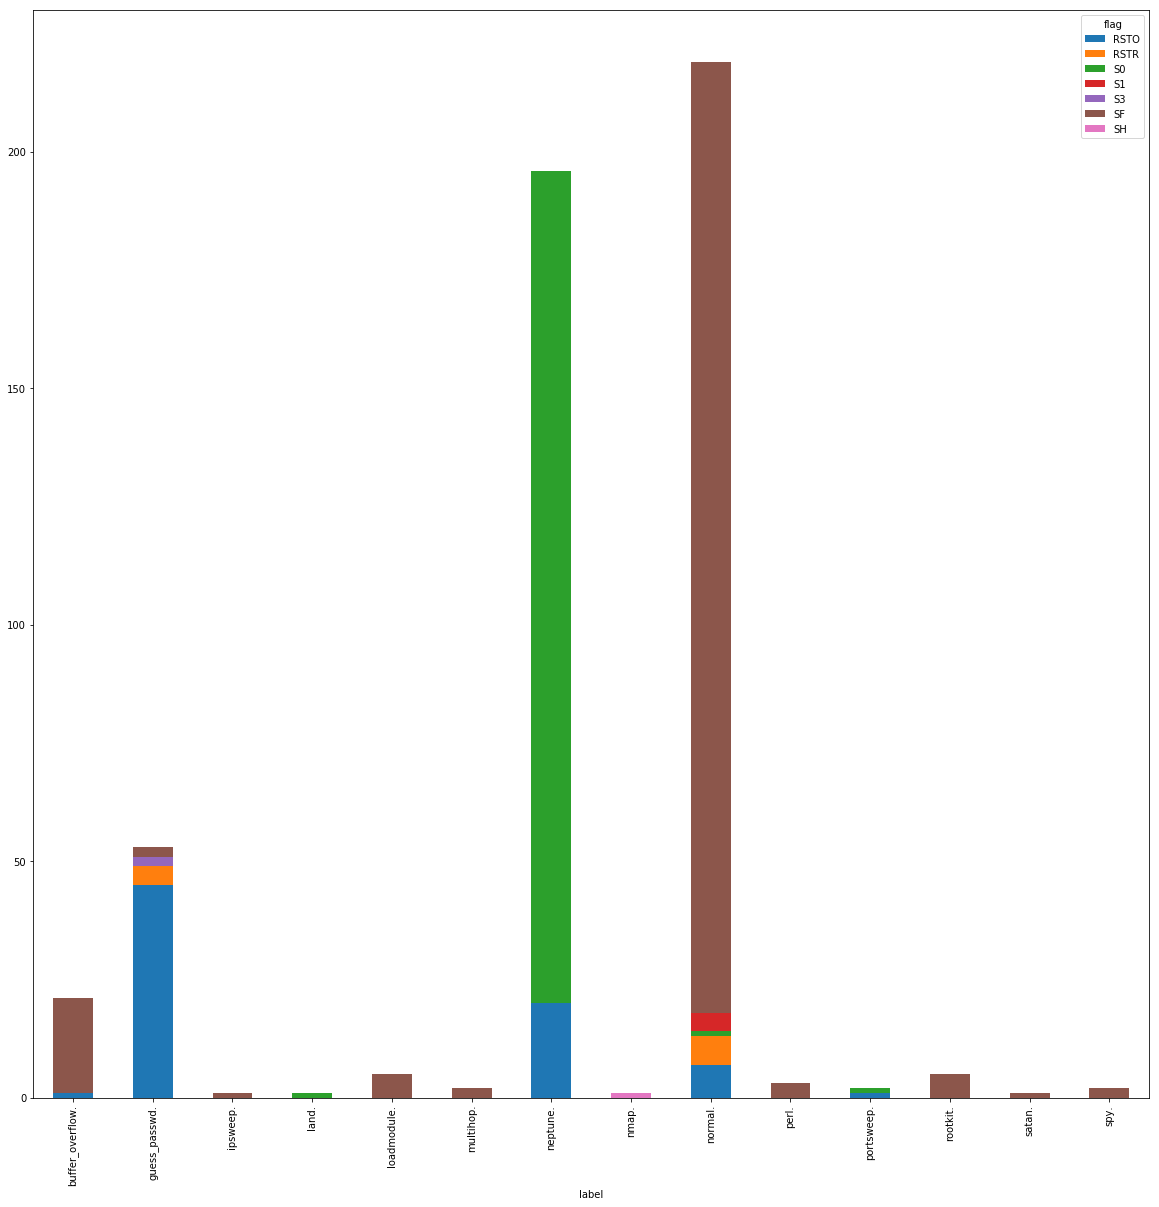

In [19]:
relationship_telnet_tcp_flag_attack.plot(kind="bar", 
                                   figsize=(20,20),
                                   stacked=True);

# Lets create two groups for all attacks to determine how TCP flags help indicate Normal Vs Malicilous Telnet Connection

In [59]:
df_binary = df.copy()
df_binary.loc[df_binary.label != 'normal.','label']= 1
df_binary.loc[df_binary.label == 'normal.','label']= 0
#df_binary
tcp_binary_telnet_data = df_binary[df_binary['service'] == 'telnet']
#tcp_binary_telnet_data

In [30]:
#tcp_binary_telnet_data
## Create a Table for Plotting
binary_telnet_tcp_flag_attack = pd.crosstab(index=tcp_binary_telnet_data["label"], 
                                           columns=tcp_binary_telnet_data["flag"])
#binary_telnet_tcp_flag_attack

# The plot below clearly indicates predominant use of SYN Flood (S0) and Connection Reset (RST0) in Telnet Malicious attacks

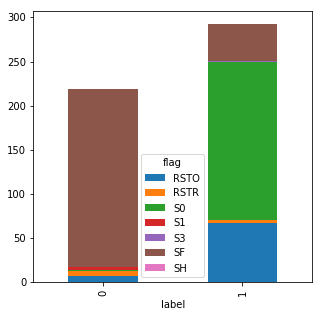

In [31]:
binary_telnet_tcp_flag_attack.plot(kind="bar", 
                                   figsize=(5, 5),
                                   stacked=True);

# In our extracted data, Label 0 : Normal Telnet Connection, Label 1: Malicious Telnet Connection

In [57]:
binary_telnet_tcp_flag_attack


flag,RSTO,RSTR,S0,S1,S3,SF,SH
label,,,,,,,
0,7,6,1,4,0,201,0
1,67,4,178,0,2,41,1


# Lets Calculate Average distribution of S0 & RST0 flags 

In [90]:
binary_telnet_tcp_flag_attack.loc[0,['S0']].mean()

1.0

In [53]:
binary_telnet_tcp_flag_attack.loc[1,['S0']].mean()

178.0

In [54]:
binary_telnet_tcp_flag_attack.loc[0,['RSTO']].mean()

7.0

In [55]:
binary_telnet_tcp_flag_attack.loc[1,['RSTO']].mean()

67.0

 # How Traffic features computed using a two-second time window related to a Normal Vs Attack Telnet Connection  for SNY Flood/Reset attacks?

In [83]:
df_traffic_features = tcp_binary_telnet_data[['label','flag', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate']]
df_traffic_s0 = df_traffic_features[df_traffic_features['flag'] == 'S0' ]
df_traffic_s0.groupby('label').sum()

,count,serror_rate,rerror_rate,same_srv_rate,srv_count,srv_serror_rate,srv_rerror_rate
label,,,,,,,
0,1,1.00,0.00,1.00,1,1.0,0.0
1,24379,177.31,0.46,38.91,1758,178.0,0.0


In [82]:
df_traffic_rst0 = df_traffic_features[df_traffic_features['flag'] == 'RSTO']
df_traffic_rst0.groupby('label').sum()

,count,serror_rate,rerror_rate,same_srv_rate,srv_count,srv_serror_rate,srv_rerror_rate
label,,,,,,,
0,8,0.00,6.50,6.50,7,0.0,7.0
1,4701,1.49,65.51,46.87,262,0.5,66.5


In [92]:
percent_s0_req = df_traffic_s0['srv_count'].sum()/df_traffic_features['srv_count'].sum() * 100
percent_s0_req

76.67829119442023

In [93]:
percent_rst0_req = df_traffic_rst0['srv_count'].sum()/df_traffic_features['srv_count'].sum() * 100
percent_rst0_req

11.72624237140366

# We can conclude from analysis above, 76% of malicious Telnet Attacks use SYN Flood and 11% Telnet Attacks use Reset Flood compared to a Normal Telnet Connection